In [2]:
import re
import os
import time
import pickle
import IPython
import sklearn
import numpy as np
import kmapper as km
import pandas as pd
import seaborn as sns
from umap import UMAP

from tqdm import tqdm
from collections import defaultdict
from sklearn.manifold import t_sne, isomap

from sklearn import datasets
from sklearn.cluster import DBSCAN

from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import cx_Oracle

# oracle
oracle_user = "ro_user"
oracle_pass = "ro_user"
oracle_scheme = "aml_evraz"
oracle_host = "192.168.101.13/rnd"
oracle_connection = cx_Oracle.connect(oracle_user, oracle_pass, oracle_host, encoding = "UTF-8", nencoding = "UTF-8")
oracle_cursor = oracle_connection.cursor()


%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [3]:
class Timer:
    def __init__(self, msg='operation', verbose=True):
        self.msg = msg
        self.verbose = verbose       
    def __enter__(self, ):
        self.start = time.clock()
        return self

    def __exit__(self, *args):
        self.end = time.clock()
        self.interval = self.end - self.start
        if self.verbose:
            print('{} took {:.3f}s'.format(self.msg, self.interval), flush=True)


def df_categorical_variables_stat(df, max_cardinality=200):
    for colname in df.columns:
        print('next_column: {}'.format(colname))
        uniq_vals = df[colname].unique()
        nunique = len(uniq_vals)
        print("# of uniqs: {}".format(nunique))
        if nunique < max_cardinality:
            print('Viable Categorical. Value counts:')
            print(df[colname].value_counts(dropna=False))
        else:
            print('High cardinality/Non categorical')
        print((('-' * 80) + '\n')*3)

In [4]:
data_size, data_dim = 120 * 1000, 32
test_data = np.random.normal(0, 1, (data_size, data_dim))

test_data[::3] = np.random.normal(0.5, 1.2, (data_size // 3, data_dim))
test_data[1::3] = np.random.normal(-0.2, 0.2, (data_size // 3, data_dim))

In [5]:
test_data.shape

(120000, 32)

In [6]:
projector = UMAP(n_neighbors=40, n_components=2, min_dist=0.2, verbose=True)

UMAP(n_neighbors=40, n_components=2, metric='euclidean',  gamma=1.0, n_epochs=None, alpha=1.0, init='spectral', spread=1.0, min_dist=0.2, a=None, b=None, random_state=None, metric_kwds={}, verbose=True)


In [8]:
with Timer('compute umap for 120k'):
    projected = projector.fit_transform(test_data)

Construct fuzzy simplicial set
	 0  /  17
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
	 9  /  17
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
compute umap for 120k took 794.105s


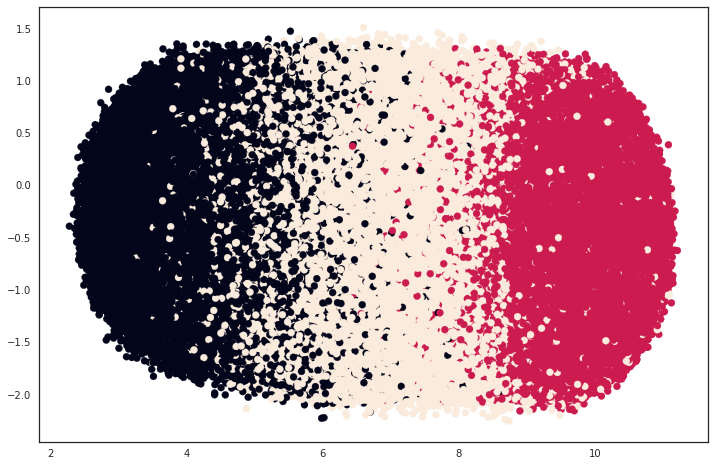

In [14]:
plt.scatter(*projected.T, c=np.tile([0, 1, 2], 40000))

In [16]:
from sklearn.decomposition import TruncatedSVD, PCA

In [17]:
pca_proj = PCA(n_components=2).fit_transform(test_data)

In [18]:
svd_proj = TruncatedSVD().fit_transform(test_data)

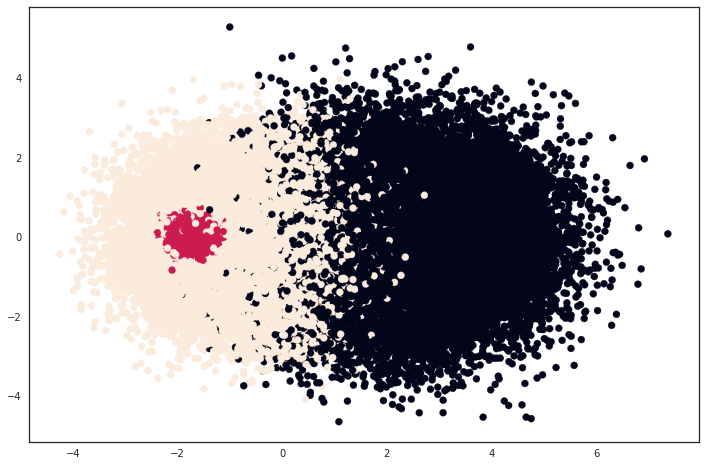

In [19]:
plt.scatter(*pca_proj.T, c=np.tile([0, 1, 2], 40000))

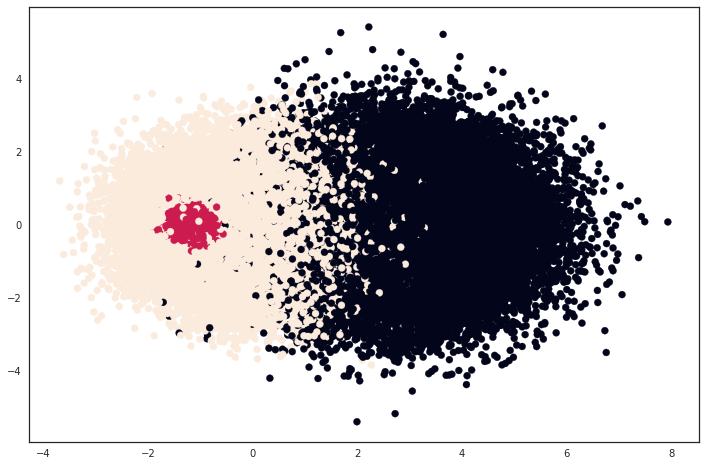

In [20]:
plt.scatter(*svd_proj.T, c=np.tile([0, 1, 2], 40000))